In [1]:
from warnings import filterwarnings
filterwarnings ("ignore")

In [2]:
# Read Te Data set 

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("Datasets.csv")
df.head()

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,10.42.0.211-104.97.95.172-59522-80-6,192.168.2.112,2142,75.126.101.175,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,216.58.217.68-10.42.0.211-443-59345-6,147.32.84.170,2108,208.100.48.73,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1
2,10.42.0.151-54.192.38.7-52510-443-6,147.32.84.170,3805,125.14.233.194,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
3,216.58.219.206-10.42.0.42-443-53294-6,147.32.84.180,3008,205.188.146.193,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
4,10.42.0.1-10.42.0.42-53-62597-17,147.32.84.160,11697,184.173.217.40,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5472 non-null   object 
 1   Sender_IP           5472 non-null   object 
 2   Sender_Port         5472 non-null   int64  
 3   Target_IP           5472 non-null   object 
 4   Target_Port         5472 non-null   int64  
 5   Transport_Protocol  5472 non-null   int64  
 6   Duration            5472 non-null   float64
 7   AvgDuration         5472 non-null   float64
 8   PBS                 5472 non-null   int64  
 9   AvgPBS              5472 non-null   float64
 10  TBS                 5472 non-null   int64  
 11  PBR                 5472 non-null   int64  
 12  AvgPBR              5472 non-null   float64
 13  TBR                 5472 non-null   int64  
 14  Missed_Bytes        5472 non-null   int64  
 15  Packets_Sent        5472 non-null   int64  
 16  Packet

In [6]:
s=df.isna().sum()

In [7]:
s=df.duplicated().sum()
s

0

In [8]:
s[s>0]

array([], dtype=int64)

In [9]:
X = df.drop(columns=['ID','Sender_IP','Target_IP','class'])
Y = df[['class']]

In [10]:
Y.head()

,class
0,0
1,1
2,1
3,1
4,1


In [11]:
X.head()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR
0,2142,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333
1,2108,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000
2,3805,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000
3,3008,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000
4,11697,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000


In [12]:
Y.value_counts()

class
1        3447
0        2025
Name: count, dtype: int64

In [13]:
X.dtypes

Sender_Port             int64
Target_Port             int64
Transport_Protocol      int64
Duration              float64
AvgDuration           float64
PBS                     int64
AvgPBS                float64
TBS                     int64
PBR                     int64
AvgPBR                float64
TBR                     int64
Missed_Bytes            int64
Packets_Sent            int64
Packets_Received        int64
SRPR                  float64
dtype: object

In [14]:
# Create Preprocessing pipe line

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('scaler', StandardScaler())])

In [17]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler())])

In [18]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-0.79436522, -0.32979132, -0.79803078, ...,  0.07480286,
         0.02927054,  0.20327772],
       [-0.79622687, -0.37456109, -0.79803078, ..., -0.05964958,
        -0.10511397, -1.18269475],
       [-0.70330875, -0.37456109, -0.79803078, ..., -0.07885707,
        -0.10511397, -1.18269475],
       ...,
       [-0.85552582, -0.37126451,  1.2530845 , ..., -0.07885707,
        -0.096155  , -0.35111127],
       [-0.80706823, -0.36839329, -0.79803078, ..., -0.05004584,
        -0.0692781 ,  0.14783882],
       [-0.75970572, -0.37456109, -0.79803078, ..., -0.07885707,
        -0.096155  , -0.35111127]])

In [19]:
cols = num_pipe.get_feature_names_out()
cols

array(['Sender_Port', 'Target_Port', 'Transport_Protocol', 'Duration',
       'AvgDuration', 'PBS', 'AvgPBS', 'TBS', 'PBR', 'AvgPBR', 'TBR',
       'Missed_Bytes', 'Packets_Sent', 'Packets_Received', 'SRPR'],
      dtype=object)

In [20]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR
0,-0.794365,-0.329791,-0.798031,-0.028472,-0.017330,0.22938,0.006815,0.163849,-0.006183,0.108409,-0.003710,-0.026931,0.074803,0.029271,0.203278
1,-0.796227,-0.374561,-0.798031,-0.032668,-0.022471,-0.08520,-0.039158,-0.081971,-0.070396,-0.100785,-0.069985,-0.026931,-0.059650,-0.105114,-1.182695
2,-0.703309,-0.374561,-0.798031,-0.042503,-0.022471,-0.08520,-0.039158,-0.095836,-0.070396,-0.100785,-0.069985,-0.026931,-0.078857,-0.105114,-1.182695
3,-0.746948,-0.374242,-0.798031,-0.032799,-0.021880,-0.08520,-0.039158,-0.095836,-0.070396,-0.100785,-0.069985,-0.026931,-0.078857,-0.105114,-1.182695
4,-0.271187,-0.329791,-0.798031,-0.042011,-0.023989,-0.08520,-0.039158,-0.095836,-0.070396,-0.100785,-0.069773,-0.026931,-0.078857,-0.096155,-0.351111


In [21]:
# Apply Test Train split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.1, random_state=42)

In [23]:
xtrain.head()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR
1128,1.696574,-0.368393,-0.798031,-0.041552,-0.023790,-0.043399,-0.031112,-0.048463,-0.063878,-0.091186,-0.062157,0.052292,-0.050046,-0.060319,0.480472
3732,1.887557,-0.371265,1.253084,-0.042503,-0.024156,-0.077430,-0.037074,-0.101469,-0.069849,-0.099710,-0.069985,-0.026931,-0.088461,-0.105114,-1.182695
1370,1.121106,-0.371265,1.253084,-0.042503,-0.024156,-0.077430,-0.037074,-0.101469,-0.069849,-0.099710,-0.069985,-0.026931,-0.088461,-0.105114,-1.182695
1297,1.133371,-0.368393,-0.798031,-0.041782,-0.023802,-0.043399,-0.031125,-0.048463,-0.063429,-0.091186,-0.061716,0.057127,-0.050046,-0.060319,0.480472
4650,-0.808985,-0.368393,-0.798031,-0.033881,-0.021191,-0.085200,-0.039158,-0.061173,-0.070396,-0.100785,-0.069305,-0.026931,-0.021235,-0.078237,-0.559007


In [24]:
ytrain.head()

,class
1128,1
3732,1
1370,1
1297,1
4650,1


In [25]:
ytest.head()

,class
5441,1
4359,1
1084,1
896,0
3964,0


In [26]:
xtest.head()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR
5441,-0.795789,-0.362119,-0.798031,-0.042470,-0.024069,0.177664,0.013477,0.096689,-0.066547,-0.095367,-0.064034,-0.026931,0.007577,-0.015524,0.329275
4359,-0.792668,-0.368393,-0.798031,0.027686,-0.016007,0.515556,-0.005233,0.375439,-0.011358,0.137524,-0.007518,-0.026931,0.142029,0.083024,0.214366
1084,-0.628186,-0.329791,-0.798031,-0.042011,-0.023989,-0.085200,-0.039158,-0.095836,-0.070396,-0.100785,-0.069773,-0.026931,-0.078857,-0.096155,-0.351111
896,-0.275677,-0.371265,1.253084,-0.041651,-0.023871,-0.075554,-0.037263,-0.100458,-0.069470,-0.098928,-0.068927,-0.026931,-0.088461,-0.096155,0.480472
3964,0.853905,2.036839,1.253084,-0.006474,-0.003498,-0.071803,-0.036029,-0.094392,-0.070396,-0.100785,-0.069985,-0.026931,-0.078857,-0.105114,-1.182695


In [27]:
xtrain.shape

(4924, 15)

In [28]:
xtest.shape

(548, 15)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [30]:
model = Sequential()

# Hidden Layer 1 with 17 input neurons
model.add(Dense(64, activation='relu', input_dim=xtrain.shape[1]))
model.add(Dropout(0.4))

# Hidden Layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output Layer Binary Classification - Sigmoid
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# COmpile the model

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Fit model

In [35]:
hist = model.fit(xtrain, ytrain, validation_split=0.1, epochs=100)

Epoch 1/100


139/139 [==============================] - 3s 7ms/step - loss: 0.5720 - accuracy: 0.6888 - val_loss: 0.4520 - val_accuracy: 0.7992
Epoch 2/100
139/139 [==============================] - 1s 9ms/step - loss: 0.4714 - accuracy: 0.7644 - val_loss: 0.4267 - val_accuracy: 0.7992
Epoch 3/100
139/139 [==============================] - 2s 12ms/step - loss: 0.4483 - accuracy: 0.7732 - val_loss: 0.4207 - val_accuracy: 0.8032
Epoch 4/100
139/139 [==============================] - 1s 8ms/step - loss: 0.4320 - accuracy: 0.7777 - val_loss: 0.4208 - val_accuracy: 0.7708
Epoch 5/100
139/139 [==============================] - 1s 9ms/step - loss: 0.4180 - accuracy: 0.7894 - val_loss: 0.4176 - val_accuracy: 0.7748
Epoch 6/100
139/139 [==============================] - 1s 7ms/step - loss: 0.4195 - accuracy: 0.7894 - val_loss: 0.4177 - val_accuracy: 0.7728
Epoch 7/100
139/139 [==============================] - 1s 7ms/step - loss: 0.4214 - accuracy: 0.7827 - val_loss: 0.4171 - val_accuracy: 0.7

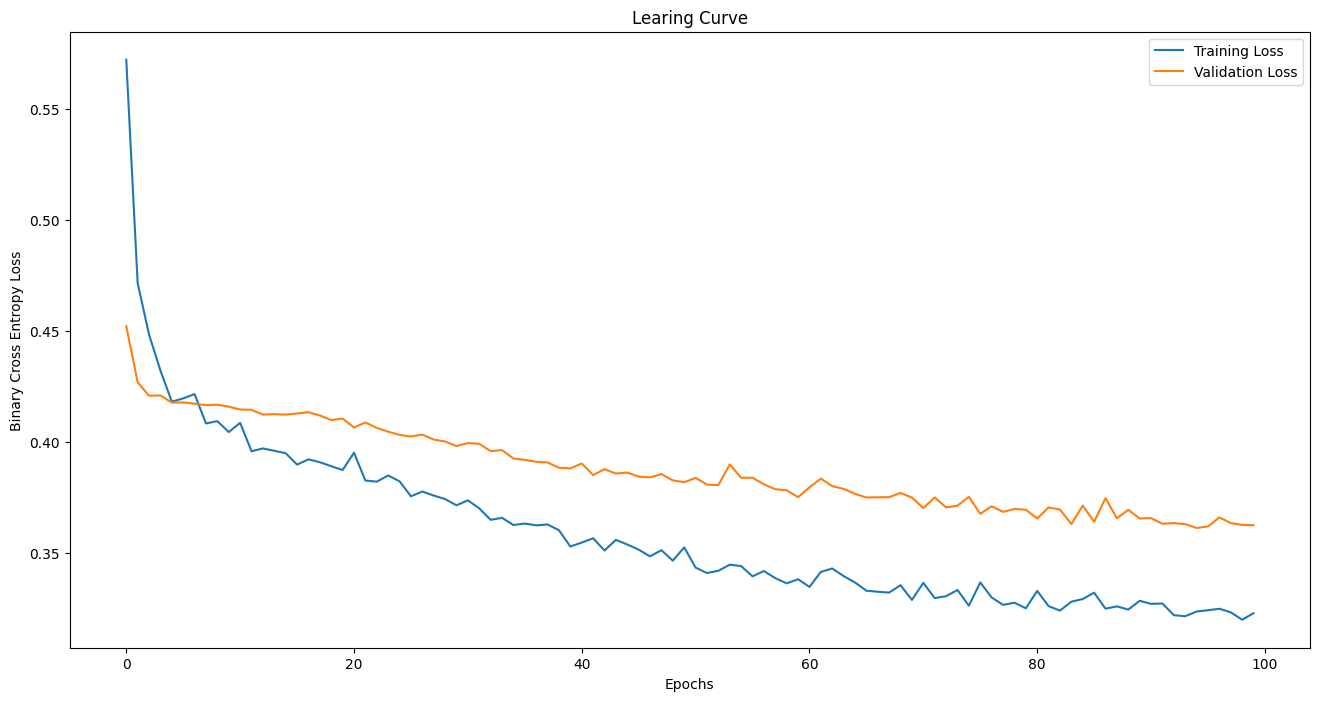

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Learing Curve')
plt.legend()
plt.show()

In [37]:
# Evalute model

In [38]:
model.evaluate(xtrain, ytrain)

154/154 [==============================] - 1s 7ms/step - loss: 0.3108 - accuracy: 0.8266


[0.3108066916465759, 0.8265637755393982]

In [39]:
model.evaluate(xtest, ytest)

18/18 [==============================] - 0s 12ms/step - loss: 0.3406 - accuracy: 0.8212


[0.34056374430656433, 0.8211678862571716]

In [40]:
# Predect the probilities

In [41]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

18/18 [==============================] - 0s 4ms/step


In [43]:
yprob_tr[0:5]

array([[0.9643505 ],
       [0.99985486],
       [0.9994338 ],
       [0.93446416],
       [0.99659175]], dtype=float32)

In [44]:
yprob_ts[0:5]

array([[5.6683016e-01],
       [5.7631618e-01],
       [9.7191411e-01],
       [2.8182375e-01],
       [8.9348308e-05]], dtype=float32)

In [45]:
ypred_tr=[1 if i>=0.5 else 0 for i in yprob_tr]
ypred_tr[0:5]

[1, 1, 1, 1, 1]

In [46]:
ytrain.head()

,class
1128,1
3732,1
1370,1
1297,1
4650,1


In [49]:
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts]
ypred_ts[0:5]

[1, 1, 1, 0, 0]

In [48]:
ytest.head()

,class
5441,1
4359,1
1084,1
896,0
3964,0


In [50]:
# Create confuction matrix

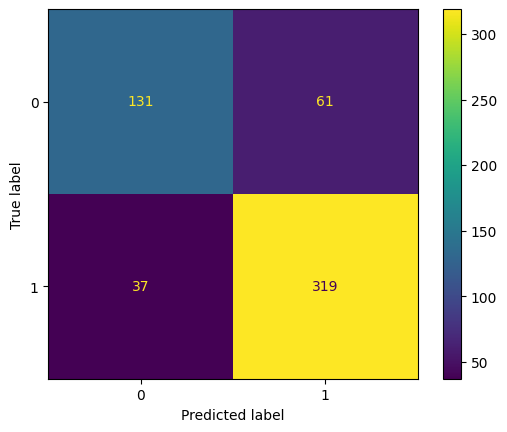

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf=confusion_matrix(ytest, ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [52]:
# Check classafication report

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       192
           1       0.84      0.90      0.87       356

    accuracy                           0.82       548
   macro avg       0.81      0.79      0.80       548
weighted avg       0.82      0.82      0.82       548



In [55]:
model.save('Dataset keras')

INFO:tensorflow:Assets written to: Dataset keras\assets


INFO:tensorflow:Assets written to: Dataset keras\assets
